# Q1-Dataset and Pre-Processing

In [1]:
import os
import json

# Get current working directory
current_directory = os.getcwd()
coursework_dataset_path = os.path.join(current_directory, 'coursework_dataset')
# List all files in the current folder
files_in_coursework_dataset_path = os.listdir(coursework_dataset_path)
# Print a list of files
for file_name in files_in_coursework_dataset_path:
    print(file_name)

with open('coursework_dataset/train.json') as f:
    train_data = json.load(f)
print(len(train_data))
with open('coursework_dataset/test.json') as f:
    test_data = json.load(f)
print(len(test_data))
with open('coursework_dataset/val.json') as f:
    validation_data = json.load(f)
print(len(validation_data))


train.json
val.json
test.json
741
202
103


In [2]:
import spacy
from tqdm import tqdm # This provides a nice progress bar
# Load the small english model.
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
nlp.remove_pipe('lemmatizer')

def text_pipeline_spacy_special(text):
  tokens = []
  doc = nlp(text)
  for t in doc:
    if not t.is_punct and not t.is_space: # what we removed: "not t.is_stop and"
      tokens.append(t.text.lower()) # what we changed: t.text instead of t.lemma_
  return tokens


for info in tqdm(train_data):
    info['quetions_tokens'] = text_pipeline_spacy_special(info['question'])
    optionLis = []
    for option in info['options']:
      optionLis.append(text_pipeline_spacy_special(option))
    info['options_tokens'] = optionLis

for info in tqdm(test_data):
    info['quetions_tokens'] = text_pipeline_spacy_special(info['question'])
    optionLis = []
    for option in info['options']:
      optionLis.append(text_pipeline_spacy_special(option))
    info['options_tokens'] = optionLis

for info in tqdm(validation_data):
    info['quetions_tokens'] = text_pipeline_spacy_special(info['question'])
    optionLis = []
    for option in info['options']:
      optionLis.append(text_pipeline_spacy_special(option))
    info['options_tokens'] = optionLis


100%|██████████| 103/103 [00:01<00:00, 65.46it/s]


 (1.1) How many questions and options are there in each split? [1 mark]

In [3]:
number_que_train = 0
number_opt_train = 0
for any in train_data:
  number_que_train = 1 + number_que_train
  number_opt_train = len(any['options']) + number_opt_train
print("Number of quentions in train: "+ str(number_que_train))
print("Number of options in train: "+ str(number_opt_train))

Number of quentions in train: 741
Number of options in train: 2964


In [4]:
number_que_validation = 0
number_opt_validation = 0
for any in validation_data:
  number_que_validation = 1 + number_que_validation
  number_opt_validation = len(any['options']) + number_opt_validation
print("Number of quentions in validation: "+ str(number_que_validation))
print("Number of options in validation: "+ str(number_opt_validation))

Number of quentions in validation: 103
Number of options in validation: 412


In [5]:
number_que_test = 0
number_opt_test = 0
for any in test_data:
  number_que_test = 1 + number_que_test
  number_opt_test = len(any['options']) + number_opt_test
print("Number of quentions in test: "+ str(number_que_test))
print("Number of options in test: "+ str(number_opt_test))

Number of quentions in test: 202
Number of options in test: 808


 (1.2) What is the average number of tokens per question in the training set? [1 mark]

 (1.3) What is the average number of tokens per choice in the training set? [1 mark]

 (1.4) What is the average number of tokens per correct choice in the training set? [1 mark]


 text_pipeline_spacy_special function from Lab 3 to tokenise all questions and their options

the average number of tokens per question = all number of tokens in questions / number of quentions

the average number of tokens per choice = all number of tokens in choices / number of choices

the average number of tokens per correct choice = all number of tokens in correct choice / number of correct choice

In [6]:
all_tokens_question = 0
all_tokens_choice = 0
all_tokens_cor_cho = 0
for info in train_data:
  all_tokens_question = all_tokens_question + len(info['quetions_tokens'])
  for any in info['options_tokens']:
    all_tokens_choice = all_tokens_choice + len(any)
  all_tokens_cor_cho = all_tokens_cor_cho + len(info['options_tokens'][info['correct_index']])

ave_tokens_ques = all_tokens_question / number_que_train
ave_tokens_choice = all_tokens_choice / number_opt_train
ave_tokens_per_cor = all_tokens_cor_cho / number_que_train
print("The average number of tokens per question in the training set",ave_tokens_ques)
print("The average number of tokens per choice in the training set",ave_tokens_choice)
print("The average number of tokens per correct choice",ave_tokens_per_cor)

The average number of tokens per question in the training set 6.272604588394062
The average number of tokens per choice in the training set 22.338056680161944
The average number of tokens per correct choice 26.032388663967613


(1.5) Perform any additional exploration of the data that you feel would be helpful for this multiple-choice question-answering task. Briefly describe what you found. [4 marks]

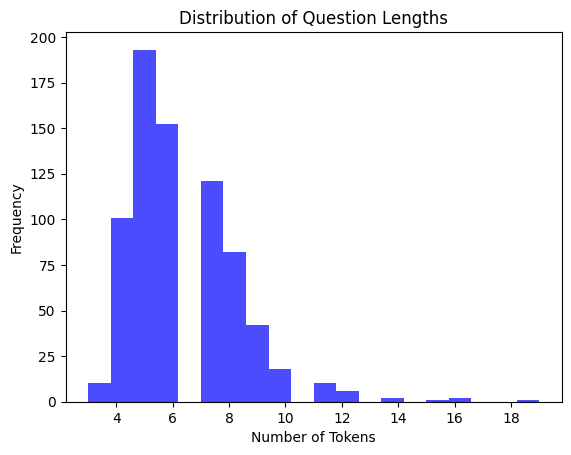

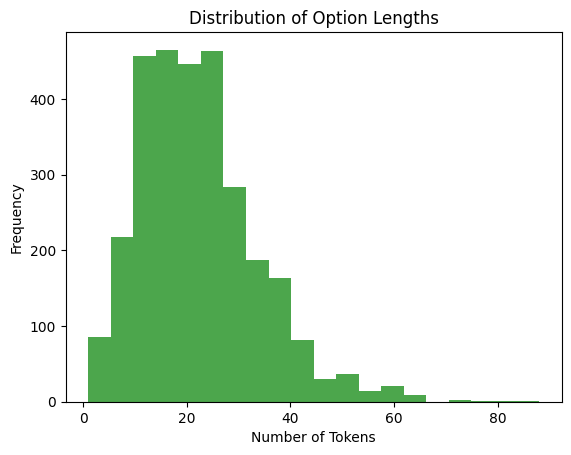

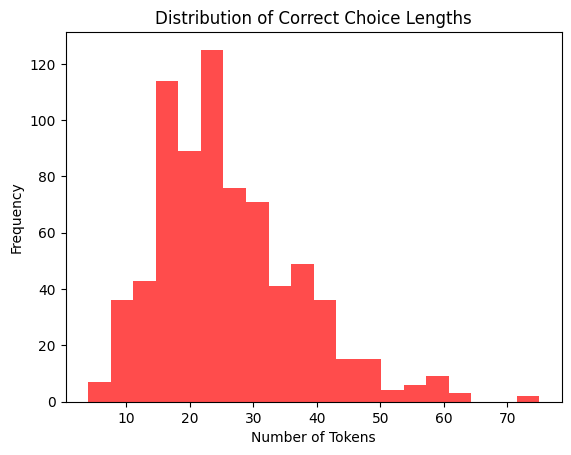

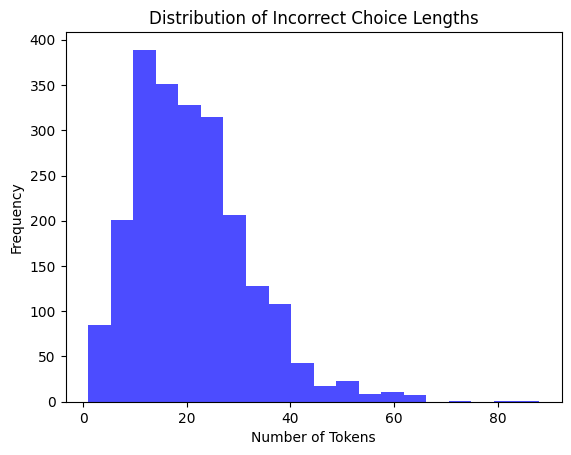

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Additional Exploration 1: Distribution of Question Lengths
question_lengths = [len(info['quetions_tokens']) for info in train_data]
plt.hist(question_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Additional Exploration 2: Distribution of Option Lengths
option_lengths = [len(token) for info in train_data for token in info['options_tokens']]
plt.hist(option_lengths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Option Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Additional Exploration 3: Analysis of Correct Choices
correct_choice_lengths = [len(info['options_tokens'][info['correct_index']]) for info in train_data]
plt.hist(correct_choice_lengths, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Correct Choice Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Additional Exploration 4: Analysis of Incorrect Choices
incorrect_choice_lengths = [len(info['options_tokens'][i]) for info in train_data for i in range(len(info['options_tokens'])) if i != info['correct_index']]
plt.hist(incorrect_choice_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Incorrect Choice Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()



In [8]:
# Additional Exploration 5: Analysis of the high frequency token in question and correct choices
from collections import Counter

count_question = Counter()
count_correct_option = Counter()
count_incorrect_option = Counter()

for info in train_data:
    count_question += Counter(info['quetions_tokens'])
    count_correct_option += Counter(info['options_tokens'][info['correct_index']])

    # Count tokens in incorrect options
    incorrect_indices = [i for i in range(len(info['options_tokens'])) if i != info['correct_index']]
    for i in incorrect_indices:
        count_incorrect_option += Counter(info['options_tokens'][i])

print("Question Token Counts:")
print(count_question)

print("\nCorrect Option Token Counts:")
print(count_correct_option)

print("\nIncorrect Option Token Counts:")
print(count_incorrect_option)


Question Token Counts:
Counter({'what': 392, 'is': 304, 'the': 254, 'in': 130, 'how': 116, 'who': 101, 'of': 94, 'a': 91, 'when': 81, 'are': 72, 'did': 66, 'does': 64, 'was': 63, 'where': 60, 'many': 47, 'do': 33, 'for': 32, 'to': 27, 'made': 24, "'s": 22, 'from': 21, 'and': 19, 'on': 19, 'mean': 19, 'war': 18, 'have': 16, 'state': 16, 'name': 16, 'an': 16, 'used': 14, 'first': 14, 'world': 13, 'county': 12, 'year': 12, 'president': 11, 'country': 11, 'much': 10, 'us': 10, 'start': 10, 'die': 9, 'at': 9, 'old': 8, 'it': 8, 'with': 8, 'song': 8, 'people': 7, 'there': 7, 'has': 7, 'as': 7, 'civil': 7, 'wrote': 7, 'come': 7, 'won': 7, 'be': 6, 'work': 6, 'countries': 6, 'day': 6, 'you': 6, 'new': 6, 'american': 6, 'human': 6, 'my': 6, 'states': 6, 'causes': 6, 'created': 6, 'located': 6, 'owns': 6, 'john': 6, 'long': 5, 'singer': 5, 'live': 5, 'group': 5, 'killed': 5, 'kind': 5, 'invented': 5, 'most': 5, 'begin': 5, 'born': 5, 'disease': 5, '1': 4, 'water': 4, 'harry': 4, 'can': 4, 'nixon

# Q2-Set Similarity Measures
 Use set similarity measures to calculate the similarity scores for **each question** against its **four corresponding answers**. You should use the tokenizer from Q1. For each question, **pick the answer with the highest similarity score**.

 (2.1) Report the performance of each similarity measure (overlap coefficient, Sorensen-Dice & Jaccard) on the
 training and validation sets by measuring accuracy.

In [9]:
def count_overlapping_tokens_with_sets(tokens_X, tokens_Y):
  count = 0
  for x in set(tokens_X):
    for y in set(tokens_Y):
      if x == y :
        count = count + 1
  return count

The `overlap_coefficient` function using the equation below.

`X ∩ Y` is the intersection of the sets X and Y and that `| X ∩ Y |` is the number of elements in that intersection.

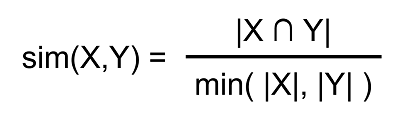

In [10]:
def overlap_coefficient(tokens_X,tokens_Y):
  tokens_X = set(tokens_X)
  tokens_Y = set(tokens_Y)

  intersection = tokens_X.intersection(tokens_Y)
  return len(intersection) / min(len(tokens_X),len(tokens_Y))

In [11]:
correct_number = 0
for each in train_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = overlap_coefficient(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('overlap coefficient accuracy in training set: ' + str(correct_number/number_que_train))

overlap coefficient accuracy in training set: 0.5236167341430499


In [12]:
correct_number = 0
for each in validation_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = overlap_coefficient(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('overlap coefficient accuracy in validation set: ' + str(correct_number/number_que_validation))

overlap coefficient accuracy in validation set: 0.46601941747572817


Sorenson-Dice Coefficient.

the `sorenson_dice` function using the equation below:

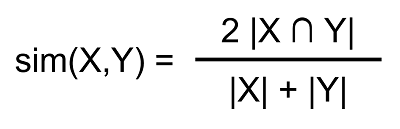

In [13]:
def sorenson_dice(tokens_X,tokens_Y):
  tokens_X = set(tokens_X)
  tokens_Y = set(tokens_Y)

  intersection = tokens_X.intersection(tokens_Y)
  return 2 * len(intersection) / (len(tokens_X) + len(tokens_Y))

In [14]:
correct_number = 0
for each in train_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = sorenson_dice(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('Sorensen-Dice accuracy in training set: ' + str(correct_number/number_que_train))

Sorensen-Dice accuracy in training set: 0.4291497975708502


In [15]:
correct_number = 0
for each in validation_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = sorenson_dice(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('Sorensen accuracy in validation set: ' + str(correct_number/number_que_validation))

Sorensen accuracy in validation set: 0.3592233009708738


Jaccard Similarity.

the `jaccard_similarity` function using the equation below

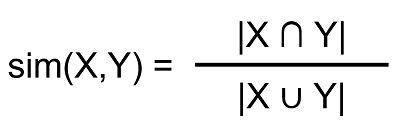

In [16]:
def jaccard_similarity(tokens_X,tokens_Y):
  tokens_X = set(tokens_X)
  tokens_Y = set(tokens_Y)

  intersection = tokens_X.intersection(tokens_Y)
  union = tokens_X.union(tokens_Y)
  return len(intersection) / len(union)

In [17]:
correct_number = 0
for each in train_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = jaccard_similarity(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('jaccard accuracy in training set: ' + str(correct_number/number_que_train))

jaccard accuracy in training set: 0.4291497975708502


In [18]:
correct_number = 0
for each in validation_data:
  question = each['quetions_tokens']
  temp_score = {}
  index = 0
  while index < len(each['options_tokens']):
    score = jaccard_similarity(question,each['options_tokens'][index])
    temp_score[each['options'][index]] = score
    index = index + 1
  max_key = max(temp_score, key=temp_score.get)
  max_value = temp_score[max_key]
  max_index = list(temp_score.values()).index(max_value)
  if max_index == each['correct_index']:
    correct_number = correct_number + 1
print('jaccard accuracy in validation set: ' + str(correct_number/number_que_validation))

jaccard accuracy in validation set: 0.3592233009708738


(2.2) For each similarity measure, how many times was the score of the most similar answer tied with another
 answer? When there was a tied score among the top answers, how did you choose which to select? Why?

In [19]:
ties_count = 0
correct_number =0
for each in train_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = overlap_coefficient(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(train_data)
print(f'overlap_coefficient Similarity accuracy in the training set: {accuracy:.2%}')
print(f'Number of ties in overlap_coefficient Similarity: {ties_count}')

overlap_coefficient Similarity accuracy in the training set: 52.36%
Number of ties in overlap_coefficient Similarity: 246


In [20]:
ties_count = 0
correct_number =0
for each in validation_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = overlap_coefficient(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(validation_data)
print(f'overlap_coefficient Similarity accuracy in the validation set: {accuracy:.2%}')
print(f'Number of ties in overlap_coefficient Similarity: {ties_count}')

overlap_coefficient Similarity accuracy in the validation set: 46.60%
Number of ties in overlap_coefficient Similarity: 29


In [21]:
ties_count = 0
correct_number =0
for each in train_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = sorenson_dice(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(train_data)
print(f'sorenson_dice Similarity accuracy in the training set: {accuracy:.2%}')
print(f'Number of ties in sorenson_dice Similarity: {ties_count}')

sorenson_dice Similarity accuracy in the training set: 42.91%
Number of ties in sorenson_dice Similarity: 20


In [22]:
ties_count = 0
correct_number =0
for each in validation_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = sorenson_dice(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(validation_data)
print(f'sorenson_dice Similarity accuracy in the validation set: {accuracy:.2%}')
print(f'Number of ties in sorenson_dice Similarity: {ties_count}')

sorenson_dice Similarity accuracy in the validation set: 35.92%
Number of ties in sorenson_dice Similarity: 4


In [23]:
ties_count = 0
correct_number =0
for each in train_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = jaccard_similarity(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(train_data)
print(f'Jaccard Similarity accuracy in the training set: {accuracy:.2%}')
print(f'Number of ties in Jaccard Similarity: {ties_count}')

Jaccard Similarity accuracy in the training set: 42.91%
Number of ties in Jaccard Similarity: 20


In [24]:
ties_count = 0
correct_number =0
for each in validation_data:
    question = each['quetions_tokens']
    temp_score = {}
    index = 0

    while index < len(each['options_tokens']):
        score = jaccard_similarity(question, each['options_tokens'][index])
        temp_score[each['options'][index]] = score
        index = index + 1

    max_score = max(temp_score.values())
    max_keys = [key for key, value in temp_score.items() if value == max_score]

    if len(max_keys) > 1:
        ties_count += 1
    # Choose the first option in the case of a tie
    max_key = max_keys[0]
    max_index = list(temp_score.keys()).index(max_key)

    # Further processing based on your specific needs

    if max_index == each['correct_index']:
        correct_number = correct_number + 1

accuracy = correct_number / len(validation_data)
print(f'Jaccard Similarity accuracy in the validation set: {accuracy:.2%}')
print(f'Number of ties in Jaccard Similarity: {ties_count}')

Jaccard Similarity accuracy in the validation set: 35.92%
Number of ties in Jaccard Similarity: 4


# Q3-Cosine similarity of TF vectors

Generate term frequency (TF) vectors of each question as well as the four possible answers. You should use the **CountVectorizer** with default settings (but use the same tokenizer as in Q1 and Q2). For each question, pick the answer with the highest cosine similarity between its TF vector and the question's TF vector.

 (3.1) Report the performance of the training and validation sets by measuring accuracy. Discuss how they compare with the set similarity measures from Q2.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
def Count_vectorize_with_sklearn(text_corpus):
  countVectorizer = CountVectorizer(tokenizer = text_pipeline_spacy_special)
  sparse_matrix = countVectorizer.fit_transform(text_corpus)
  return sparse_matrix

In [26]:
texts_of_question = [ p['question'] for p in train_data ]
texts_of_ques_options = []
for any in train_data:
  texts_of_ques_options.append(any['question'])
start_of_question = len(texts_of_question)
for any in train_data:
  for option in any['options']:
    texts_of_ques_options.append(option)
question_option_Counter_matrix = Count_vectorize_with_sklearn(texts_of_ques_options)
print(f"question_Counter_matrix.shape={question_option_Counter_matrix.shape}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


question_Counter_matrix.shape=(3705, 11671)


In [27]:
import numpy as np
from scipy.sparse import csr_matrix

correctNum = 0
index_question = 0
index_answer = start_of_question
count_num = 0
Nwq = 0
Nwql = 0
while index_answer<question_option_Counter_matrix.shape[0]:
  scores_with_optionIndex = []
  target_question = question_option_Counter_matrix[index_question,:]
  norm_target = np.linalg.norm(target_question.toarray())
  count_four = 0
  while count_four<4:
    other_vector = question_option_Counter_matrix[index_answer, :]
    dot_product = target_question.dot(other_vector.T)
    norm_other = np.linalg.norm(other_vector.toarray())
    similarity_score = dot_product / (norm_target * norm_other)
    scores_with_optionIndex.append((similarity_score.toarray()[0][0],count_four,index_answer))
    index_answer = index_answer + 1
    count_four = count_four + 1
  sorted_scores_with_optionIndex = sorted(scores_with_optionIndex, reverse=True, key=lambda x:x[0])
  if train_data[index_question]['correct_index'] == sorted_scores_with_optionIndex[0][1]:
    correctNum = correctNum + 1
  else:
    print('Wrong! '+ ' Q: '+ texts_of_ques_options[index_question]+ ' A: '+ texts_of_ques_options[sorted_scores_with_optionIndex[0][2]])
    Nwql = Nwql+len(texts_of_ques_options[index_question].split())
    Nwq = Nwq + 1

    pass
  index_question = index_question + 1
  count_num = count_num + 1
print('cosine similarity in training set: '+ str(correctNum/count_num))
print("average tokens of wrong term"+ str(Nwql/Nwq))

Wrong!  Q: how much is 1 tablespoon of water A: In the US and parts of Canada, a tablespoon is the largest type of spoon used for eating from a bowl.
Wrong!  Q: how are cholera and typhus transmitted and prevented A: The severity of the diarrhea and vomiting can lead to rapid dehydration and electrolyte imbalance, and death in some cases.
Wrong!  Q: how are aircraft radial engines built A: Radial engine of a biplane
Wrong!  Q: how deep can be drill for deep underwater A: It has been economically infeasible for many years, but with rising oil prices, more companies are investing in this area.
Wrong!  Q: how long was frank sinatra famous A: Francis Albert "Frank" Sinatra, , (December 12, 1915 – May 14, 1998) was an American singer and film actor.
Wrong!  Q: how much is jk rowling worth A: Joanne "Jo" Rowling (), (born 31 July 1965), pen name J. K. Rowling, is a British novelist, best known as the author of the Harry Potter fantasy series.
Wrong!  Q: how big is auburndale florida A: Aubur

In [28]:
texts_of_question = [ p['question'] for p in validation_data ]
texts_of_ques_options = []
for any in validation_data:
  texts_of_ques_options.append(any['question'])
start_of_question = len(texts_of_question)
for any in validation_data:
  for option in any['options']:
    texts_of_ques_options.append(option)

question_option_Counter_matrix = Count_vectorize_with_sklearn(texts_of_ques_options)
print(f"question_Counter_matrix.shape={question_option_Counter_matrix.shape}")


correctNum = 0
index_question = 0
index_answer = start_of_question
count_num = 0
while index_answer<question_option_Counter_matrix.shape[0]:
  scores_with_optionIndex = []
  target_question = question_option_Counter_matrix[index_question,:]
  norm_target = np.linalg.norm(target_question.toarray())
  count_four = 0
  while count_four<4:
    other_vector = question_option_Counter_matrix[index_answer, :]
    dot_product = target_question.dot(other_vector.T)
    norm_other = np.linalg.norm(other_vector.toarray())
    similarity_score = dot_product / (norm_target * norm_other)
    scores_with_optionIndex.append((similarity_score[0][0],count_four))
    index_answer = index_answer + 1
    count_four = count_four + 1

  sorted_scores_with_optionIndex = sorted(scores_with_optionIndex, reverse=True, key=lambda x:x[0])
  if validation_data[index_question]['correct_index'] == sorted_scores_with_optionIndex[0][1]:
    correctNum = correctNum + 1
  else:
    print('Wrong! '+ str(validation_data[index_question]['correct_index']) + ' Q: '+ validation_data[index_question]['question']+ ' A: '+ validation_data[index_question]['options'][sorted_scores_with_optionIndex[0][1]])
    pass
  index_question = index_question + 1
  count_num = count_num + 1
print('cosine similarity in validation_data set: '+ str(correctNum/count_num))

question_Counter_matrix.shape=(515, 3037)
Wrong! 3 Q: how big is bmc software in houston, tx A: BMC Software, Inc. is an American company specializing in Business Service Management (BSM) software.
Wrong! 2 Q: how long was i love lucy on the air A: I Love Lucy was the most watched show in the United States in four of its six seasons, and was the first to end its run at the top of the Nielsen ratings (an accomplishment later matched by The Andy Griffith Show and Seinfeld ).
Wrong! 2 Q: what bird family is the owl A: Most are solitary and nocturnal , with some exceptions (e.g., the Northern Hawk Owl ).
Wrong! 3 Q: how many people were killed in the oklahoma city bombing A: The Oklahoma City bombing was a domestic terrorist bomb attack on the Alfred P. Murrah Federal Building in downtown Oklahoma City on April 19, 1995.
Wrong! 3 Q: how many xbox 360 games are there A: This is a list of retail Xbox 360 games released or planned for release on DVD .
Wrong! 0 Q: what does the federal reserve

 (3.2) Propose, motivate, and evaluate one modification to this process to improve this method. Report the performance on the training and development sets and compare them with the unmodified version.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF_vectorize_with_sklearn(text_corpus):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy_special)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_corpus)
    return tfidf_matrix
texts_of_question = [ p['question'] for p in train_data ]
texts_of_ques_options = []
for any in train_data:
  texts_of_ques_options.append(any['question'])
start_of_question = len(texts_of_question)
for any in train_data:
  for option in any['options']:
    texts_of_ques_options.append(option)
question_option_Counter_matrix = TFIDF_vectorize_with_sklearn(texts_of_ques_options)

In [30]:
stop_words = {'the', 'of', 'and'}
texts_of_question = [ p['question'] for p in train_data ]
texts_of_ques_options = []
for any in train_data:
  texts_of_ques_options.append(any['question'])
start_of_question = len(texts_of_question)
for any in train_data:
  for option in any['options']:
    modified_string = ' '.join([word for word in option.split() if word.lower() not in stop_words])
    texts_of_ques_options.append(modified_string)
question_option_Counter_matrix = Count_vectorize_with_sklearn(texts_of_ques_options)
print(f"question_Counter_matrix.shape={question_option_Counter_matrix.shape}")

question_Counter_matrix.shape=(3705, 11671)


In [31]:
correctNum = 0
index_question = 0
index_answer = start_of_question
count_num = 0
Nwq = 0
Nwql = 0
while index_answer<question_option_Counter_matrix.shape[0]:
  scores_with_optionIndex = []
  target_question = question_option_Counter_matrix[index_question,:]
  norm_target = np.linalg.norm(target_question.toarray())
  count_four = 0
  while count_four<4:
    other_vector = question_option_Counter_matrix[index_answer, :]
    dot_product = target_question.dot(other_vector.T)
    norm_other = np.linalg.norm(other_vector.toarray())
    similarity_score = dot_product / (norm_target * norm_other)
    scores_with_optionIndex.append((similarity_score.toarray()[0][0],count_four,index_answer))
    index_answer = index_answer + 1
    count_four = count_four + 1
  sorted_scores_with_optionIndex = sorted(scores_with_optionIndex, reverse=True, key=lambda x:x[0])
  if train_data[index_question]['correct_index'] == sorted_scores_with_optionIndex[0][1]:
    correctNum = correctNum + 1
  else:
    print('Wrong! '+ ' Q: '+ texts_of_ques_options[index_question]+ ' A: '+ texts_of_ques_options[sorted_scores_with_optionIndex[0][2]])
    Nwql = Nwql+len(texts_of_ques_options[index_question].split())
    Nwq = Nwq + 1

    pass
  index_question = index_question + 1
  count_num = count_num + 1
print('cosine similarity in training set: '+ str(correctNum/count_num))

Wrong!  Q: how much is 1 tablespoon of water A: In US parts Canada, a tablespoon is largest type spoon used for eating from a bowl.
Wrong!  Q: how are cholera and typhus transmitted and prevented A: main symptoms are watery diarrhea vomiting .
Wrong!  Q: how did anne frank die A: Annelies "Anne" Marie Frank (, ?, ; 12 June 1929early March 1945) is one most discussed Jewish victims Holocaust .
Wrong!  Q: how are aircraft radial engines built A: Radial engine a biplane
Wrong!  Q: how deep can be drill for deep underwater A: It has been economically infeasible for many years, but with rising oil prices, more companies are investing in this area.
Wrong!  Q: how long was frank sinatra famous A: Francis Albert "Frank" Sinatra, , (December 12, 1915 – May 14, 1998) was an American singer film actor.
Wrong!  Q: how much is jk rowling worth A: Joanne "Jo" Rowling (), (born 31 July 1965), pen name J. K. Rowling, is a British novelist, best known as author Harry Potter fantasy series.
Wrong!  Q: h

In [32]:
stop_words = {'the', 'of', 'and'}
texts_of_question = [ p['question'] for p in validation_data ]
texts_of_ques_options = []
for any in validation_data:
  texts_of_ques_options.append(any['question'])
start_of_question = len(texts_of_question)
for any in validation_data:
  for option in any['options']:
    modified_string = ' '.join([word for word in option.split() if word.lower() not in stop_words])
    texts_of_ques_options.append(modified_string)
question_option_Counter_matrix = Count_vectorize_with_sklearn(texts_of_ques_options)
print(f"question_Counter_matrix.shape={question_option_Counter_matrix.shape}")

correctNum = 0
index_question = 0
index_answer = start_of_question
count_num = 0
Nwq = 0
Nwql = 0
while index_answer<question_option_Counter_matrix.shape[0]:
  scores_with_optionIndex = []
  target_question = question_option_Counter_matrix[index_question,:]
  norm_target = np.linalg.norm(target_question.toarray())
  count_four = 0
  while count_four<4:
    other_vector = question_option_Counter_matrix[index_answer, :]
    dot_product = target_question.dot(other_vector.T)
    norm_other = np.linalg.norm(other_vector.toarray())
    similarity_score = dot_product / (norm_target * norm_other)
    scores_with_optionIndex.append((similarity_score.toarray()[0][0],count_four,index_answer))
    index_answer = index_answer + 1
    count_four = count_four + 1
  sorted_scores_with_optionIndex = sorted(scores_with_optionIndex, reverse=True, key=lambda x:x[0])
  if validation_data[index_question]['correct_index'] == sorted_scores_with_optionIndex[0][1]:
    correctNum = correctNum + 1
  else:
    print('Wrong! '+ ' Q: '+ texts_of_ques_options[index_question]+ ' A: '+ texts_of_ques_options[sorted_scores_with_optionIndex[0][2]])
    pass
  index_question = index_question + 1
  count_num = count_num + 1
print('cosine similarity in validation set: '+ str(correctNum/count_num))

question_Counter_matrix.shape=(515, 3037)
Wrong!  Q: how big is bmc software in houston, tx A: BMC Software, Inc. is an American company specializing in Business Service Management (BSM) software.
Wrong!  Q: how long was i love lucy on the air A: I Love Lucy was most watched show in United States in four its six seasons, was first to end its run at top Nielsen ratings (an accomplishment later matched by Andy Griffith Show Seinfeld ).
Wrong!  Q: what bird family is the owl A: Most are solitary nocturnal , with some exceptions (e.g., Northern Hawk Owl ).
Wrong!  Q: how many people were killed in the oklahoma city bombing A: Oklahoma City bombing was a domestic terrorist bomb attack on Alfred P. Murrah Federal Building in downtown Oklahoma City on April 19, 1995.
Wrong!  Q: how many xbox 360 games are there A: This is a list retail Xbox 360 games released or planned for release on DVD .
Wrong!  Q: what does the federal reserve do A: Federal Reserve System (also known as Federal Reserve, i

#Q4-Cosine similarity of vectors from bert-base-uncased

Use the **feature-extraction pipeline** with a **bert-based-uncased model** to create context vectors from the bert-based-uncased model for the text of each question and its four answers separately. **You should use the context vector that represents the [CLS] token**, which will be the first vector. For each question, pick the answer with the highest cosine similarity between its vector and the question’s vector.

 (4.1) Report the performance of the training and validation sets by measuring accuracy.

In [33]:
from transformers import pipeline

pipe = pipeline('feature-extraction', model="bert-base-uncased")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [34]:
import torch
from torch.nn.functional import cosine_similarity
from tqdm import tqdm

In [35]:
dataset = train_data
corrNum = 0
for info in tqdm(dataset):
  question = info['question']
  question_vet = pipe(question,return_tensors='pt')[0, 0, :].unsqueeze(0)
  choose_lis = []
  for option in info['options']:
    opt_vec = pipe(option,return_tensors='pt')[0, 0, :].unsqueeze(0)
    choose_lis.append(cosine_similarity(question_vet,opt_vec))
  max_index = choose_lis.index(max(choose_lis))
  if max_index == info['correct_index']:
    corrNum = corrNum + 1
acc = corrNum/len(dataset)
print(f"Cosine similarity Accuracy in bert pipline training set: {acc:.3f}")

100%|██████████| 741/741 [02:43<00:00,  4.52it/s]

Cosine similarity Accuracy in bert pipline training set: 0.143


In [36]:
dataset = validation_data
corrNum = 0
for info in tqdm(dataset):
  question = info['question']
  question_vet = pipe(question,return_tensors='pt')[0, 0, :].unsqueeze(0)
  choose_lis = []
  for option in info['options']:
    opt_vec = pipe(option,return_tensors='pt')[0, 0, :].unsqueeze(0)
    choose_lis.append(cosine_similarity(question_vet,opt_vec))
  max_index = choose_lis.index(max(choose_lis))
  if max_index == info['correct_index']:
    corrNum = corrNum + 1
acc = corrNum/len(dataset)
print(f"Cosine similarity Accuracy in bert pipline validation set: {acc:.3f}")

100%|██████████| 103/103 [00:22<00:00,  4.60it/s]

Cosine similarity Accuracy in bert pipline validation set: 0.204


 (4.2) What are the limitations of the set similarity and cosine similarity methods used in Q2, Q3 and Q4?

#Q5-Fine-tuning a transformer model

 Train an AutoModelForSequenceClassification with a bert-based-uncased model on this dataset. This will involve transformation of the data as described below. You should train only on the training questions and use the validation set for evaluation.


 Transform the dataset into a table of rows with each containing a question, an option and a label (1 or 0) if it is the
 correct answer. The table (referred to as the question-option pairs representation) should have four times the number of rows as questions in the original question dataset. Concatenate each question and option together with “[SEP]” text in between them. For example, the question “where is osaka japan” and the incorrect option “Osaka castle” would become “where is osaka japan[SEP]Osaka castle” with a label of 0.

 In an ideal world, you would do hyperparameter tuning to identify the optimal settings. Due to computational cost,
 use these settings which should provide reasonable performance:

 ● learning_rate = 1e-5

 ● batch_size = 8

 ● epochs=4

 ● weight_decay =0

Data pre-process

In [37]:
!pip install transformers[torch] datasets

In [38]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [39]:
from datasets import Dataset

train_dataset = {"input_ids": [], "labels": []}

for info in train_data:
    ques = info['question']
    now_index = 0
    for op in info['options']:
        inp = ques + "[SEP]" + op
        inp = tokenizer.encode(inp, return_tensors="pt")[0]
        if now_index == info['correct_index']:
            label = 1
        else:
            label = 0
        train_dataset["input_ids"].append(inp)
        train_dataset["labels"].append(label)
        now_index = now_index +1
train_dataset = Dataset.from_dict(train_dataset)
print(train_dataset)

val_dataset = {"input_ids": [], "labels": []}

for info in validation_data:
    ques = info['question']
    now_index = 0
    for op in info['options']:
        inp = ques + "[SEP]" + op
        inp = tokenizer.encode(inp, return_tensors="pt")[0]
        if now_index == info['correct_index']:
            label = 1
        else:
            label = 0
        val_dataset["input_ids"].append(inp)
        val_dataset["labels"].append(label)
        now_index = now_index +1
val_dataset = Dataset.from_dict(val_dataset)
print(val_dataset)



Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 2964
})
Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 412
})


In [40]:
print(train_dataset[0])

{'input_ids': [101, 2129, 2024, 10046, 10614, 2719, 1029, 102, 1996, 3256, 8508, 2003, 3155, 3438, 1049, 2152, 102], 'labels': 0}


(5.1) Report the accuracy, precision, recall and F1 score of the predictions on the question-option pairs representation of the training and validation sets

In [41]:
from transformers import set_seed, AutoModelForSequenceClassification

set_seed(42)
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
learning_rate = 1e-5
batch_size = 8
epochs = 16 # This is set low so that the training can happen quickly for this lab.
weight_decay = 0

In [43]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
    output_dir="my_awesome_model", # HuggingFace wants a name for your model
    evaluation_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
    weight_decay=weight_decay, # Hyperparameter
)

In [44]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=val_dataset, # The data to use for evaluation
    tokenizer=tokenizer, # The tokenizer used on the data
    data_collator=data_collator, # A data collator that does clever things moving data around
)

In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.471584
2,0.505800,0.491147
3,0.401000,0.472784
4,0.401000,0.630152
5,0.276000,0.738299
6,0.185000,0.837625
7,0.126700,1.057884
8,0.126700,1.064400
9,0.087600,1.206346
10,0.064200,1.479678


TrainOutput(global_step=5936, training_loss=0.14882133455289343, metrics={'train_runtime': 327.2484, 'train_samples_per_second': 144.917, 'train_steps_per_second': 18.139, 'total_flos': 1553477559719520.0, 'train_loss': 0.14882133455289343, 'epoch': 16.0})

In [46]:
train_predictions, train_label_ids, train_metrics = trainer.predict(train_dataset)
val_predictions, val_label_ids, val_metrics = trainer.predict(val_dataset)

In [47]:
print(train_predictions.shape)

(2964, 2)


In [48]:
print(train_predictions[0])

[ 5.2177634 -5.33684  ]


In [49]:
train_prediction = []
val_prediction = []
for line in train_predictions:
  line = line.tolist()
  max_index = line.index(max(line))
  if max_index == 0:
    train_prediction.append(False)
  else:
    train_prediction.append(True)

for line in val_predictions:
  line = line.tolist()
  max_index = line.index(max(line))
  if max_index == 0:
    val_prediction.append(False)
  else:
    val_prediction.append(True)

train_lab = []
val_lab = []
for line in train_dataset['labels']:
  if line == 0:
    train_lab.append(False)
  else:
    train_lab.append(True)
for line in val_dataset['labels']:
  if line == 0:
    val_lab.append(False)
  else:
    val_lab.append(True)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("***************trainset***************")
accuracy = accuracy_score(train_lab, train_prediction)
print(f"{accuracy=:.3f}")

precision = precision_score(train_lab, train_prediction)
print(f"{precision=:.3f}")

recall = recall_score(train_lab, train_prediction)
print(f"{recall=:.3f}")

f1 = f1_score(train_lab, train_prediction)
print(f"{f1=:.3f}")
print("***************validationset***************")
accuracy = accuracy_score(val_lab, val_prediction)
print(f"{accuracy=:.3f}")

precision = precision_score(val_lab, val_prediction)
print(f"{precision=:.3f}")

recall = recall_score(val_lab, val_prediction)
print(f"{recall=:.3f}")

f1 = f1_score(val_lab, val_prediction)
print(f"{f1=:.3f}")

***************trainset***************
accuracy=0.997
precision=1.000
recall=0.989
f1=0.995
***************validationset***************
accuracy=0.799
precision=0.614
recall=0.524
f1=0.565


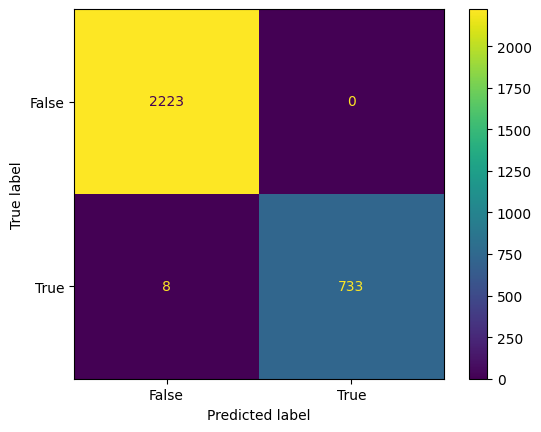

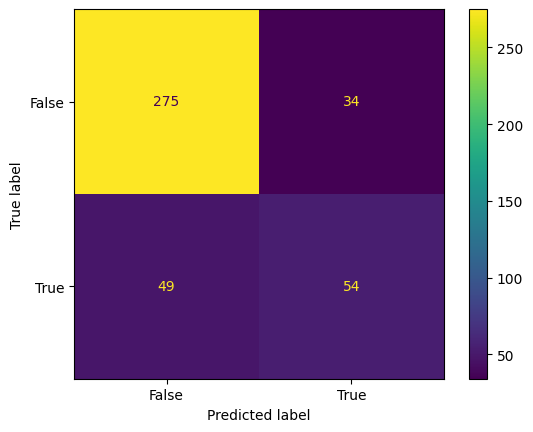

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_lab, train_prediction)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False','True']).plot()

cm = confusion_matrix(val_lab, val_prediction)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False','True']).plot()

(5.2) Report the accuracy for this method for selecting the correct answer on the training and validation sets of this model. Note this is different from the value in part (a). To enable this, select the option for each question with the highest output logit value for the positive class of the model.

In [52]:
new_list = [group[1] for group in train_predictions]
grouped_list = [new_list[i:i+4] for i in range(0, len(new_list), 4)]
max_indices = [sublist.index(max(sublist)) for sublist in grouped_list]
index = 0
corrInTrain = 0
while index<len(train_data):
  if max_indices[index] == train_data[index]['correct_index']:
    corrInTrain =corrInTrain +1
  index = index +1
print("accuracy for selecting the correct answer: "+ str(corrInTrain/len(train_data)))

new_list = [group[1] for group in val_predictions]
grouped_list = [new_list[i:i+4] for i in range(0, len(new_list), 4)]
max_indices = [sublist.index(max(sublist)) for sublist in grouped_list]
index = 0
corrInTrain = 0
while index<len(validation_data):
  if max_indices[index] == validation_data[index]['correct_index']:
    corrInTrain =corrInTrain +1
  index = index + 1
print("accuracy for selecting the correct answer: "+ str(corrInTrain/len(validation_data)))

accuracy for selecting the correct answer: 1.0
accuracy for selecting the correct answer: 0.6407766990291263


 (5.3) Why would you expect this approach to outperform the use of [CLS] vectors described in Q4?

# Q6-Test set performance

 (6.1) Report the accuracy using your best method on the test set. Use the performance on the validation set to select the best method.

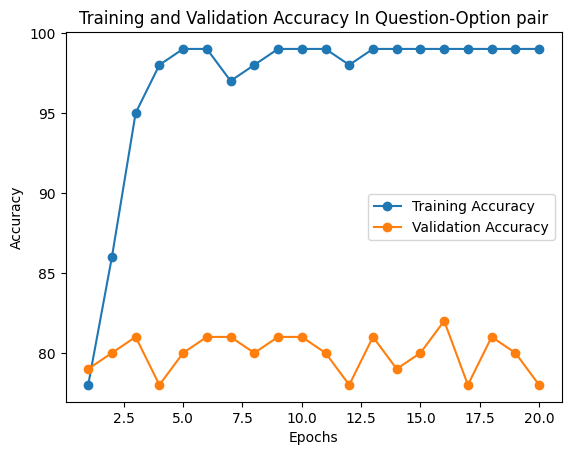

In [53]:
import matplotlib.pyplot as plt

# Accuracy data for the training and validation sets
train_accuracy = [78, 86, 95, 98, 99, 99, 97, 98, 99, 99, 99, 98, 99, 99, 99, 99, 99, 99, 99, 99]
validation_accuracy = [79, 80, 81, 78, 80, 81, 81, 80, 81, 81, 80, 78, 81, 79, 80, 82, 78, 81, 80, 78]

# Generate the corresponding epoch array
epochs = list(range(1, len(train_accuracy) + 1))

# Plot the accuracy curves for the training and validation sets
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')

# Add chart title and axis labels
plt.title('Training and Validation Accuracy In Question-Option pair')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()


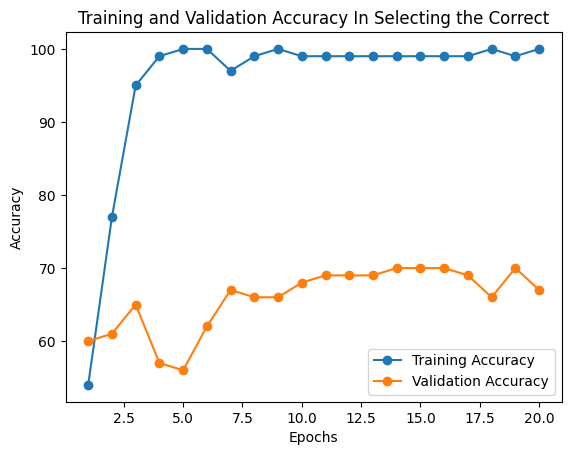

In [54]:
# Accuracy data for the training and validation sets
train_accuracy = [54,77,95,99,100,100,97,99,100,99,99,99,99,99,99,99,99,100,99,100]
validation_accuracy = [60,61,65,57,56,62,67,66,66,68,69,69,69,70,70,70,69,66,70,67]

# Generate the corresponding epoch array
epochs = list(range(1, len(train_accuracy) + 1))

# Plot the accuracy curves for the training and validation sets
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')

# Add chart title and axis labels
plt.title('Training and Validation Accuracy In Selecting the Correct')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()


Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 2964
})


***************test***************
accuracy=0.792
precision=0.579
recall=0.619
f1=0.598
accuracy for selecting the correct answer: 0.6039603960396039


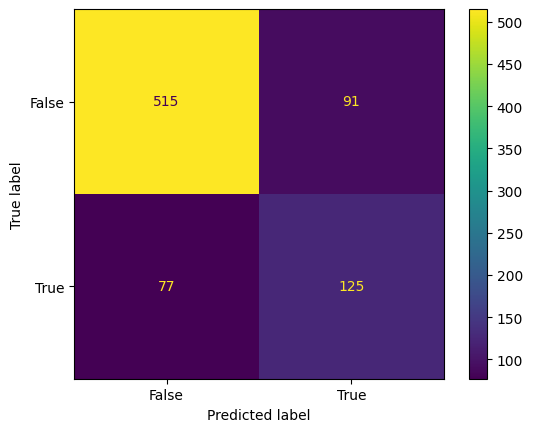

In [55]:
test_dataset = {"input_ids": [], "labels": []}

for info in test_data:
    ques = info['question']
    now_index = 0
    for op in info['options']:
        inp = ques + "[SEP]" + op
        inp = tokenizer.encode(inp, return_tensors="pt")[0]
        if now_index == info['correct_index']:
            label = 1
        else:
            label = 0
        test_dataset["input_ids"].append(inp)
        test_dataset["labels"].append(label)
        now_index = now_index +1
test_dataset = Dataset.from_dict(test_dataset)
print(train_dataset)

test_predictions, test_label_ids, test_metrics = trainer.predict(test_dataset)

test_prediction = []
for line in test_predictions:
  line = line.tolist()
  max_index = line.index(max(line))
  if max_index == 0:
    test_prediction.append(False)
  else:
    test_prediction.append(True)

test_lab = []
for line in test_dataset['labels']:
  if line == 0:
    test_lab.append(False)
  else:
    test_lab.append(True)

print("***************test***************")
accuracy = accuracy_score(test_lab, test_prediction)
print(f"{accuracy=:.3f}")

precision = precision_score(test_lab, test_prediction)
print(f"{precision=:.3f}")

recall = recall_score(test_lab, test_prediction)
print(f"{recall=:.3f}")

f1 = f1_score(test_lab, test_prediction)
print(f"{f1=:.3f}")
cm = confusion_matrix(test_lab, test_prediction)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False','True']).plot()

new_list = [group[1] for group in test_predictions]
grouped_list = [new_list[i:i+4] for i in range(0, len(new_list), 4)]
max_indices = [sublist.index(max(sublist)) for sublist in grouped_list]
index = 0
corrInTrain = 0
while index<len(test_data):
  if max_indices[index] == test_data[index]['correct_index']:
    corrInTrain =corrInTrain +1
  index = index + 1
print("accuracy for selecting the correct answer: "+ str(corrInTrain/len(test_data)))

(6.2) Discuss whether the achieved accuracy would be sufficient for deployment.